In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# Chargement des données GPS (acquisition 1)
dico1 = {'temps': [], 'date': [], 'latitude': [], 'longitude': []}
with open("acquisitions_exterieur_statique_gps.csv", mode="r", encoding="utf-8") as fichier:
    lecteur_csv = csv.reader(fichier)
    next(lecteur_csv)  # Ignorer l'en-tête
    for ligne in lecteur_csv:
        dico1['temps'].append(float(ligne[0]))
        dico1['date'].append(ligne[1])
        dico1['latitude'].append(float(ligne[2]))
        dico1['longitude'].append(float(ligne[3]))


In [3]:
# Chargement des données GPS (acquisition 2 - téléphone)
dico2 = {'temps': [], 'date': [], 'latitude': [], 'longitude': []}
with open("../data_en_csv/data_immobile_1.csv", mode="r", encoding="utf-8") as fichier:
    lecteur_csv = csv.reader(fichier)
    next(lecteur_csv)  # Ignorer l'en-tête
    for ligne in lecteur_csv:
        dico2['date'].append(ligne[0])
        dico2['latitude'].append(float(ligne[1]))
        dico2['longitude'].append(float(ligne[2]))


In [4]:
# Moyennes des latitudes et longitudes
moy_lat1, moy_long1 = np.mean(dico1['latitude']), np.mean(dico1['longitude'])
moy_lat2, moy_long2 = np.mean(dico2['latitude']), np.mean(dico2['longitude'])

In [5]:

# Erreur systématique
erreur_lat = moy_lat2 - moy_lat1
erreur_long = moy_long2 - moy_long1

In [6]:
print(f"Erreur systématique latitude: {erreur_lat} degrés")
print(f"Erreur systématique longitude: {erreur_long} degrés")


Erreur systématique latitude: 9.815589336881203e-06 degrés
Erreur systématique longitude: -1.8939702802533986e-05 degrés


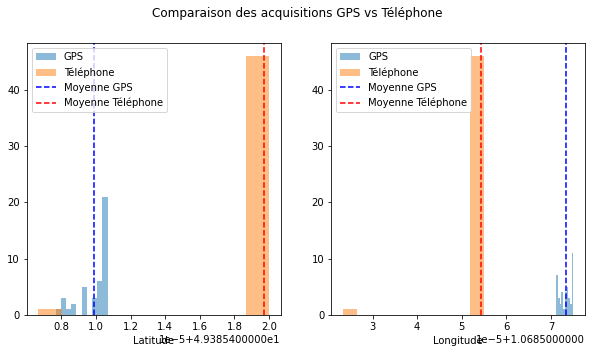

In [7]:

# Visualisation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(dico1['latitude'], alpha=0.5, label='GPS')
plt.hist(dico2['latitude'], alpha=0.5, label='Téléphone')
plt.axvline(moy_lat1, color='blue', linestyle='dashed', label='Moyenne GPS')
plt.axvline(moy_lat2, color='red', linestyle='dashed', label='Moyenne Téléphone')
plt.xlabel("Latitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(dico1['longitude'], alpha=0.5, label='GPS')
plt.hist(dico2['longitude'], alpha=0.5, label='Téléphone')
plt.axvline(moy_long1, color='blue', linestyle='dashed', label='Moyenne GPS')
plt.axvline(moy_long2, color='red', linestyle='dashed', label='Moyenne Téléphone')
plt.xlabel("Longitude")
plt.legend()

plt.suptitle("Comparaison des acquisitions GPS vs Téléphone")
plt.show()
